In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

In [2]:
gal= '69564'

1

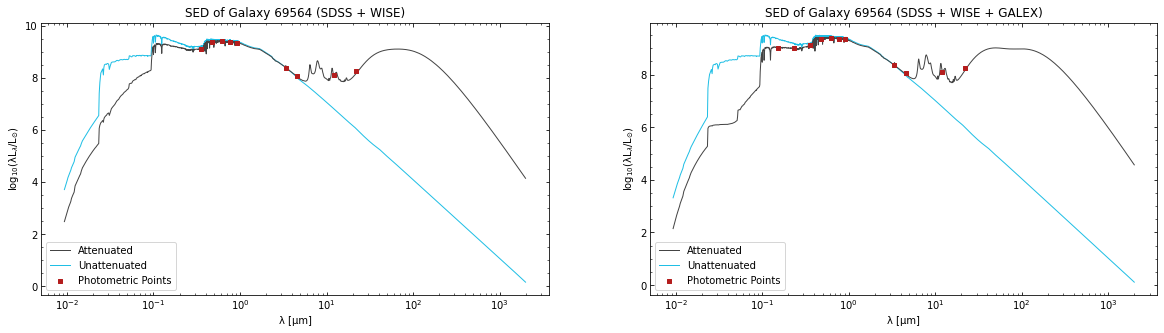

In [8]:
path= '/home/pablet/Downloads/MAGPHYS/magphys'

def plot_sed(galaxy):
    #GALEX
    filt = ascii.read(path+'/files/filters.dat')
    lambda_eff = filt['lambda_eff'] #están en micrometros

    name_fit = path+'/DATA_2/GALEX/fit/'+galaxy+'.fit'
    name_sed = path+'/DATA_2/GALEX/sed/'+galaxy+'.sed'

    data_flux = ascii.read(name_fit, data_end=2)
    flux= data_flux[0]
    
    data_fit= ascii.read(name_fit, data_start=2, data_end=3, names=['i_sfh', 'i_ir', 'chi2', 'redshift'])
    z= data_fit['redshift']
    
    data_sed= ascii.read(name_sed, data_start=2)
    wl_log= data_sed['col1']
    att= data_sed['col2']
    no_att= data_sed['col3']
    
    wl= 10**wl_log
    att= np.log10(wl*10**att)
    no_att= np.log10(wl*10**no_att)
    wl= wl*1e-4 #Angstrom a micrometro
    
    fig, (ax1,ax2)= plt.subplots(1, 2, figsize=(20,5))
    ax2.plot(wl, att, lw=1, c='#444444', label='Attenuated', zorder=2)
    ax2.plot(wl, no_att, lw=1, c='#20bfe5', label='Unattenuated', zorder=1)

    L_flux= np.log10((1+z)*list(flux)*3e14/list(lambda_eff))
    #puntos fotométricos
    ax2.scatter(lambda_eff, L_flux, c='#b41d1d', s=15, marker='s', label='Photometric Points', zorder=3)

    
    ax2.set_title('SED of Galaxy '+galaxy+' (SDSS + WISE + GALEX)')
    ax2.set_ylabel('log$_{10}$(λL$_{λ}$/L$_{\odot}$)')
    ax2.set_xlabel('λ [μm]')
    ax2.set_xscale('log')
    ax2.legend(loc='best')
    ax2.minorticks_on()
    ax2.tick_params(which='both', direction='in', top=True, right=True)

    #SDSS
    filt = ascii.read(path+'/files/filters1.dat')
    lambda_eff = filt['lambda_eff'] #están en micrometros

    name_fit = path+'/DATA_2/SDSS/fit/'+galaxy+'.fit'
    name_sed = path+'/DATA_2/SDSS/sed/'+galaxy+'.sed'

    data_flux = ascii.read(name_fit, data_end=2)
    flux= data_flux[0]
    
    data_fit= ascii.read(name_fit, data_start=2, data_end=3, names=['i_sfh', 'i_ir', 'chi2', 'redshift'])
    z= data_fit['redshift']
    
    data_sed= ascii.read(name_sed, data_start=2)
    wl_log= data_sed['col1']
    att= data_sed['col2']
    no_att= data_sed['col3']
    
    wl= 10**wl_log
    att= np.log10(wl*10**att)
    no_att= np.log10(wl*10**no_att)
    wl= wl*1e-4 #Angstrom a micrometro
    
    ax1.plot(wl, att, lw=1, c='#444444', label='Attenuated', zorder=2)
    ax1.plot(wl, no_att, lw=1, c='#20bfe5', label='Unattenuated', zorder=1)

    L_flux= np.log10((1+z)*list(flux)*3e14/list(lambda_eff))
    #puntos fotométricos
    ax1.scatter(lambda_eff, L_flux, c='#b41d1d', s=15, marker='s', label='Photometric Points', zorder=3)

    
    ax1.set_title('SED of Galaxy '+galaxy+' (SDSS + WISE)')
    ax1.set_ylabel('log$_{10}$(λL$_{λ}$/L$_{\odot}$)')
    ax1.set_xlabel('λ [μm]')
    ax1.set_xscale('log')
    ax1.legend(loc='best')
    ax1.minorticks_on()
    ax1.tick_params(which='both', direction='in', top=True, right=True)

    a=1
    return a

plot_sed(gal)
